In [322]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.optim import SGD

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

In [323]:
INPUT_DIMENSION=2
OUTPUT_DIMENSION=1
NUMBER_OF_SAMPLES=10000
EPOCHS=100
LR=0.01

In [324]:
class LinearClassifier(torch.nn.Module):
  def __init__(self):
    super(LinearClassifier, self).__init__()
    self.linear = torch.nn.Linear(in_features=INPUT_DIMENSION, out_features=OUTPUT_DIMENSION,bias=False)

  def forward(self, x):
    x = self.linear(x)
    return x

In [325]:
SAMPLE_SIZE=50

In [326]:
x_0=np.random.random(SAMPLE_SIZE)
x_1=np.random.random(SAMPLE_SIZE)

X_0=2*x_0+np.ones(SAMPLE_SIZE)+np.random.normal(0,0.3,SAMPLE_SIZE)
X_1=2*x_1-np.ones(SAMPLE_SIZE)+np.random.normal(0,0.3,SAMPLE_SIZE)

X_0=np.vstack((x_0,X_0)).T
X_1=np.vstack((x_1,X_1)).T

X=np.concatenate((X_0,X_1))
y=np.concatenate((-np.ones(len(X_0)),np.ones(len(X_1))))

X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

In [327]:
def next_batch(inputs, targets, batchSize):
	for i in range(0, inputs.shape[0], batchSize):
		yield (inputs[i:i + batchSize], targets[i:i + batchSize])

In [328]:
model = LinearClassifier()

opt = SGD(model.parameters(), lr=LR)
lossFunc = nn.MSELoss()

decision_boundaries=[]
epoch_list=[]

param_x1=[]
param_x2=[]
model_loss=[]

for epoch in range(EPOCHS):
	if (epoch+1)%10==0:
		for param in model.parameters():
			param=param.tolist()[0]
			param_x1.append(param[0])
			param_x2.append(param[1])
		trainLoss=0
		samples=0
		for x,target in next_batch(X,y,1):
			output=model(x)
			loss=lossFunc(output,target)
			trainLoss+=loss.item()
			samples+=1
		model_loss.append(trainLoss/samples)
		epoch_list.append(epoch)
	acc=0
	samples=0
	for (batchX, batchY) in next_batch(X, y, 5):
		predictions = model(batchX)
		loss = lossFunc(predictions.view(-1), batchY)
		opt.zero_grad()
		loss.backward()
		opt.step()
		acc += (torch.sign(predictions).reshape(1,len(batchY)) == batchY).sum().item()
		samples += len(batchY)
	print("Epoch: {} Loss: {:.3f} Accuracy {:.3f}".format(epoch+1,loss.item(),acc/samples))

Epoch: 1 Loss: 0.992 Accuracy 0.700
Epoch: 2 Loss: 0.895 Accuracy 0.720
Epoch: 3 Loss: 0.809 Accuracy 0.750
Epoch: 4 Loss: 0.732 Accuracy 0.790
Epoch: 5 Loss: 0.664 Accuracy 0.840
Epoch: 6 Loss: 0.602 Accuracy 0.890
Epoch: 7 Loss: 0.547 Accuracy 0.900
Epoch: 8 Loss: 0.497 Accuracy 0.940
Epoch: 9 Loss: 0.453 Accuracy 0.960
Epoch: 10 Loss: 0.413 Accuracy 0.960
Epoch: 11 Loss: 0.377 Accuracy 0.980
Epoch: 12 Loss: 0.344 Accuracy 0.990
Epoch: 13 Loss: 0.315 Accuracy 0.990
Epoch: 14 Loss: 0.289 Accuracy 1.000
Epoch: 15 Loss: 0.266 Accuracy 1.000
Epoch: 16 Loss: 0.245 Accuracy 1.000
Epoch: 17 Loss: 0.225 Accuracy 1.000
Epoch: 18 Loss: 0.208 Accuracy 1.000
Epoch: 19 Loss: 0.193 Accuracy 1.000
Epoch: 20 Loss: 0.179 Accuracy 1.000
Epoch: 21 Loss: 0.166 Accuracy 1.000
Epoch: 22 Loss: 0.155 Accuracy 1.000
Epoch: 23 Loss: 0.144 Accuracy 1.000


c:\Users\thoma\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 24 Loss: 0.135 Accuracy 1.000
Epoch: 25 Loss: 0.127 Accuracy 1.000
Epoch: 26 Loss: 0.119 Accuracy 1.000
Epoch: 27 Loss: 0.112 Accuracy 1.000
Epoch: 28 Loss: 0.106 Accuracy 1.000
Epoch: 29 Loss: 0.100 Accuracy 1.000
Epoch: 30 Loss: 0.095 Accuracy 1.000
Epoch: 31 Loss: 0.090 Accuracy 1.000
Epoch: 32 Loss: 0.086 Accuracy 1.000
Epoch: 33 Loss: 0.082 Accuracy 1.000
Epoch: 34 Loss: 0.078 Accuracy 1.000
Epoch: 35 Loss: 0.075 Accuracy 1.000
Epoch: 36 Loss: 0.072 Accuracy 1.000
Epoch: 37 Loss: 0.069 Accuracy 1.000
Epoch: 38 Loss: 0.067 Accuracy 1.000
Epoch: 39 Loss: 0.064 Accuracy 1.000
Epoch: 40 Loss: 0.062 Accuracy 1.000
Epoch: 41 Loss: 0.060 Accuracy 1.000
Epoch: 42 Loss: 0.059 Accuracy 1.000
Epoch: 43 Loss: 0.057 Accuracy 1.000
Epoch: 44 Loss: 0.055 Accuracy 1.000
Epoch: 45 Loss: 0.054 Accuracy 1.000
Epoch: 46 Loss: 0.053 Accuracy 1.000
Epoch: 47 Loss: 0.052 Accuracy 1.000
Epoch: 48 Loss: 0.051 Accuracy 1.000
Epoch: 49 Loss: 0.050 Accuracy 1.000
Epoch: 50 Loss: 0.049 Accuracy 1.000
E

In [329]:
losses=[]
for p_1 in np.linspace(min(param_x1)-0.05,max(param_x1)+0.05,50):
    row_loss=[]
    for p_2 in np.linspace(min(param_x1)-0.05,max(param_x2)+0.05,50):
        model=LinearClassifier()
        model.linear.weight=torch.nn.Parameter(torch.from_numpy(np.array([p_1,p_2])).float())
        opt = SGD(model.parameters(), lr=LR)
        lossFunc = nn.MSELoss()
        trainLoss=0
        samples=0
        for x,target in next_batch(X,y,1):
            output=model(x)
            loss=lossFunc(output,target)
            trainLoss+=loss.item()
            samples+=1
        row_loss.append(trainLoss/samples)
    losses.append(row_loss)

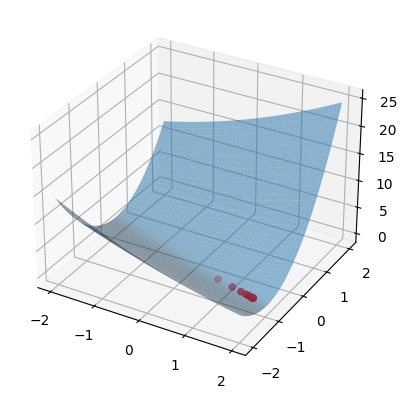

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X=np.linspace(-2,2,50)
Y=np.linspace(-2,2,50)
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X,Y,np.transpose(np.array(losses)),alpha=0.5)
ax.scatter(param_x1,param_x2,model_loss,c='red')
